In [1]:
%matplotlib inline

In [2]:
import netCDF4
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

from geophys_utils import NetCDFPointUtils

In [3]:
# Create NetCDFPointUtils object for specified netCDF dataset
######   AEM links will be updated when available ######
netcdf_path = 'http://dapds00.nci.org.au/thredds/dodsC/uc0/rr2_dev/axi547/aem/AusAEM_Year1_Tranche1_Final_EM.nc'
#netcdf_path = "D:\\Temp\\AEM Data\\AusAEM_Year1_Tranche1_Final_EM.nc"

netcdf_dataset = netCDF4.Dataset(netcdf_path)
npu = NetCDFPointUtils(netcdf_dataset, debug=False)

In [4]:
print('Point variables:\n\t{}'.format('\n\t'.join([key for key, value in netcdf_dataset.variables.items()
                                          if value.dimensions == ('point',)])))

Point variables:
	line_index
	flight_index
	fiducial
	date
	time_local
	time_utc
	gps_time
	latitude
	longitude
	easting
	northing
	gps_elevation
	tx_elevation
	lidar
	radalt
	dtm
	mag
	tx_height
	tx_pitch
	tx_roll
	tx_yaw
	tx_bearing
	hsep_pfest
	vsep_pfest
	hsep_gps
	tsep_gps
	vsep_gps
	rx_pitch
	rx_roll
	rx_yaw
	rx_bearing
	x_sferics
	x_lowfreq
	x_powerline
	x_primaryfield
	x_vlf1
	x_vlf2
	x_vlf3
	x_vlf4
	x_geofact
	z_sferics
	z_lowfreq
	z_powerline
	z_primaryfield
	z_vlf1
	z_vlf2
	z_vlf3
	z_vlf4
	z_geofact


In [5]:
line_numbers = netcdf_dataset.variables['line'][:]
print(len(line_numbers))
line_numbers

58


array([1010001, 1010002, 1010003, 1010004, 1020001, 1020002, 1020003,
       1030001, 1030002, 1030003, 1030004, 1040001, 1040002, 1050001,
       1050002, 1050003, 1060001, 1060002, 1060003, 1070001, 1070002,
       1080001, 1080002, 1090001, 1090002, 1100001, 1100002, 1110001,
       1110002, 1110003, 1120001, 1120002, 1130001, 1130002, 1140001,
       1140002, 1140003, 1150001, 1150002, 1150003, 1150004, 1160001,
       1160002, 1170001, 1170002, 1180001, 1190001, 1200001, 1200002,
       1210001, 1220001, 1220002, 1230001, 1230002, 1240001, 1240002,
       1250001, 1250002])

Retrieved and calculated values from netCDF/OPeNDAP for line number 1010001
Retrieved and calculated values from netCDF/OPeNDAP for line number 1030004
Retrieved and calculated values from netCDF/OPeNDAP for line number 1070002
Retrieved and calculated values from netCDF/OPeNDAP for line number 1120001
Retrieved and calculated values from netCDF/OPeNDAP for line number 1150004
Retrieved and calculated values from netCDF/OPeNDAP for line number 1220001


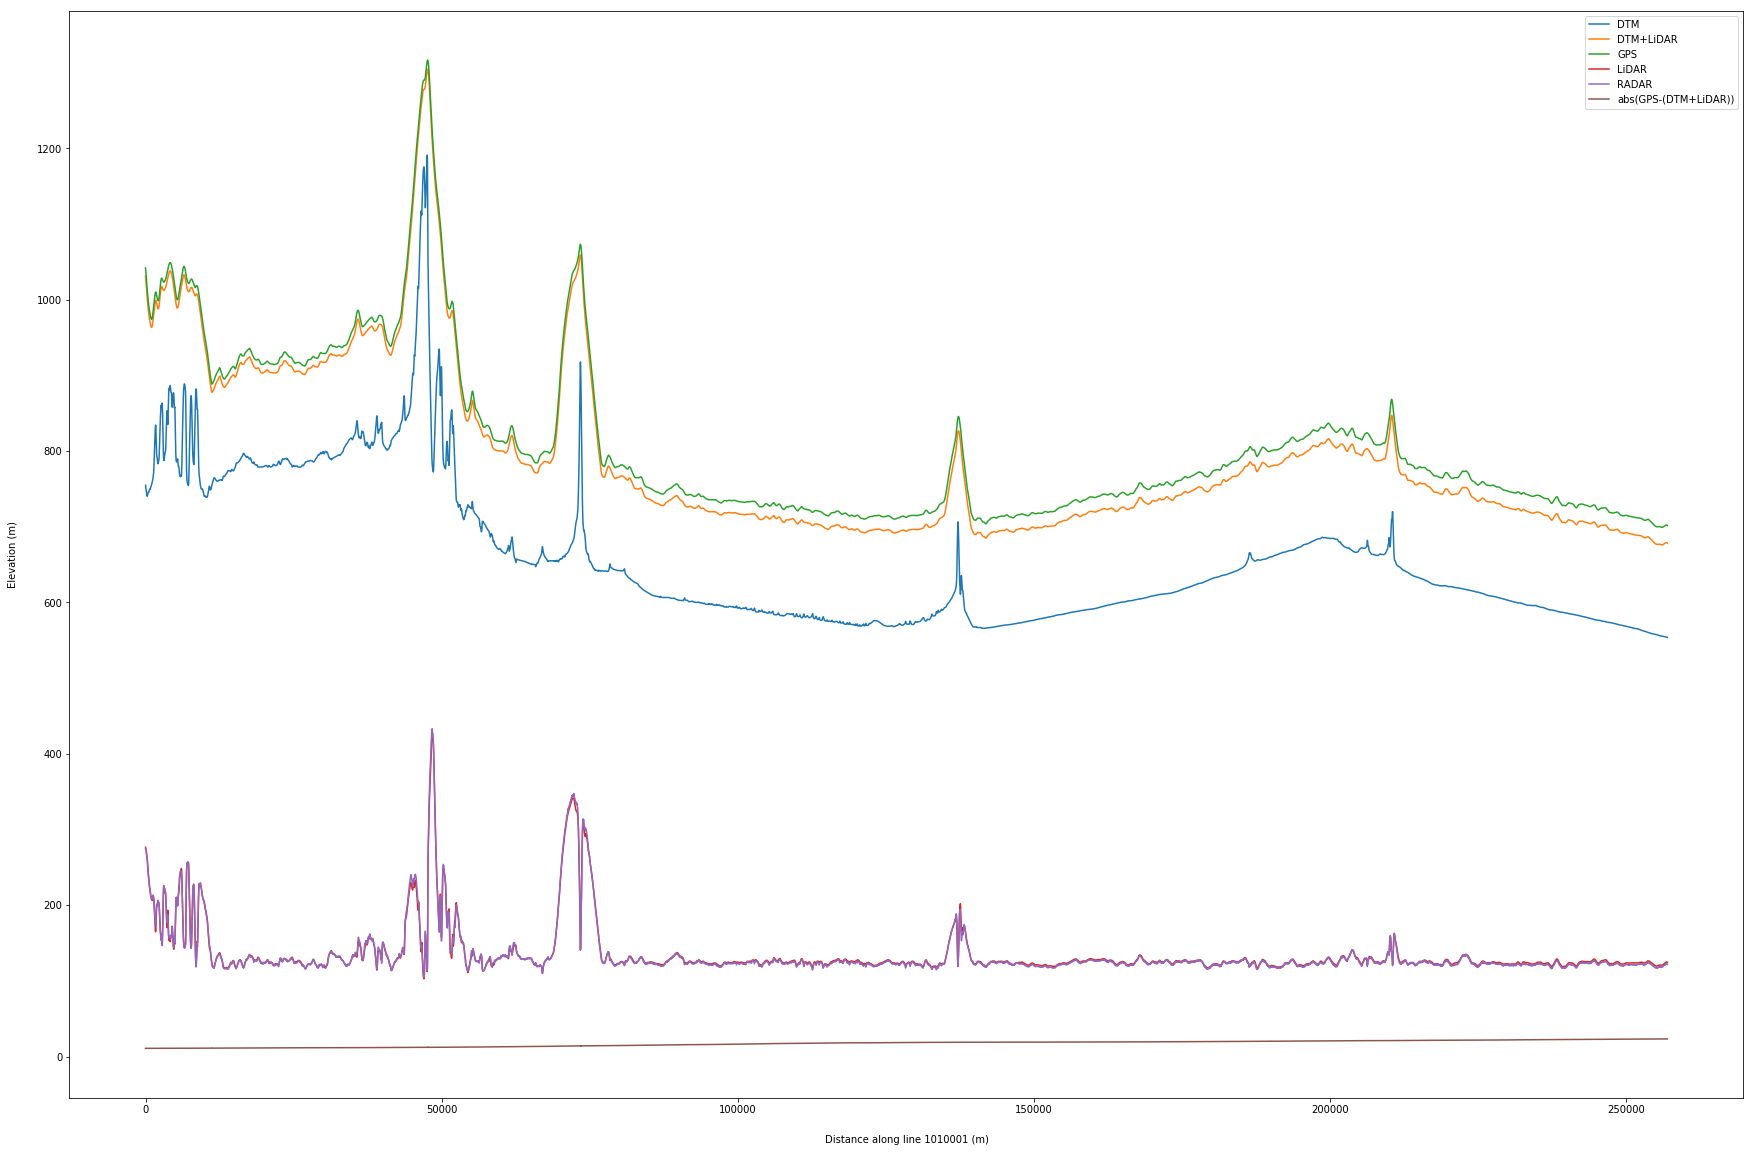

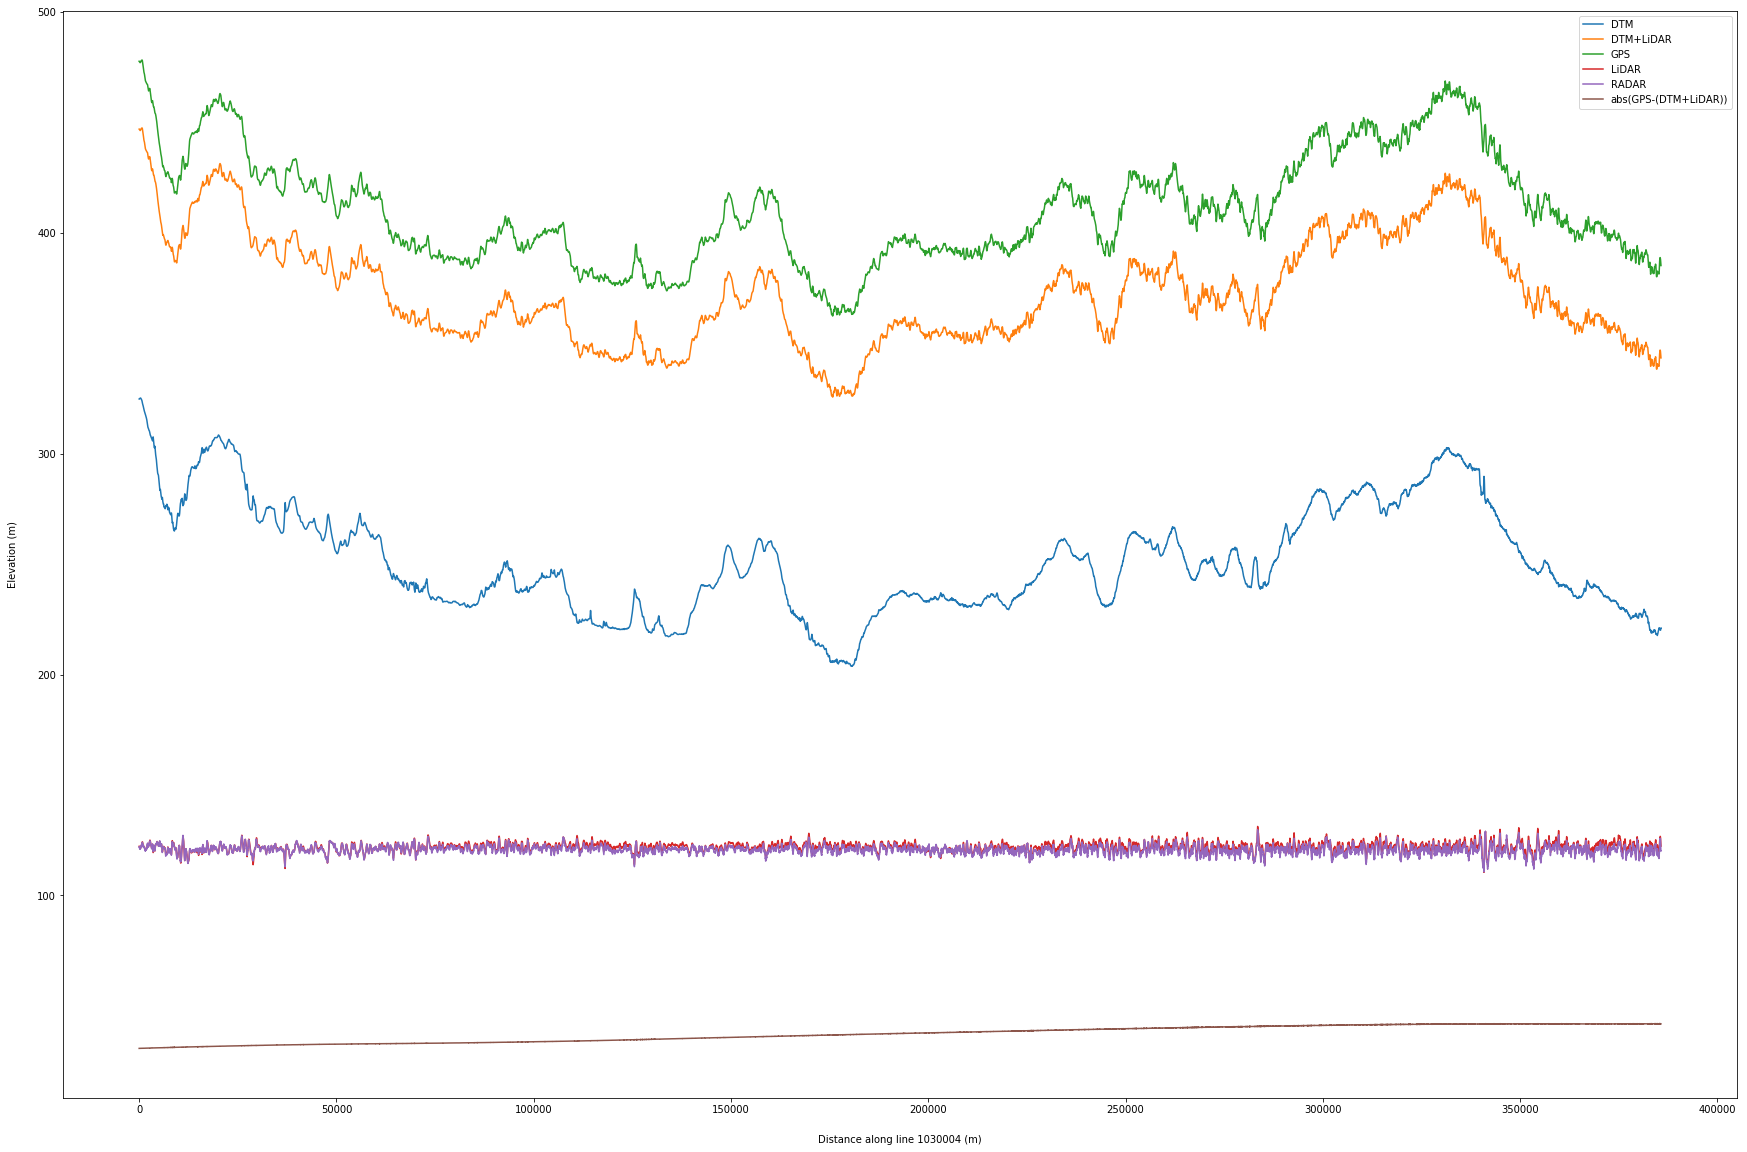

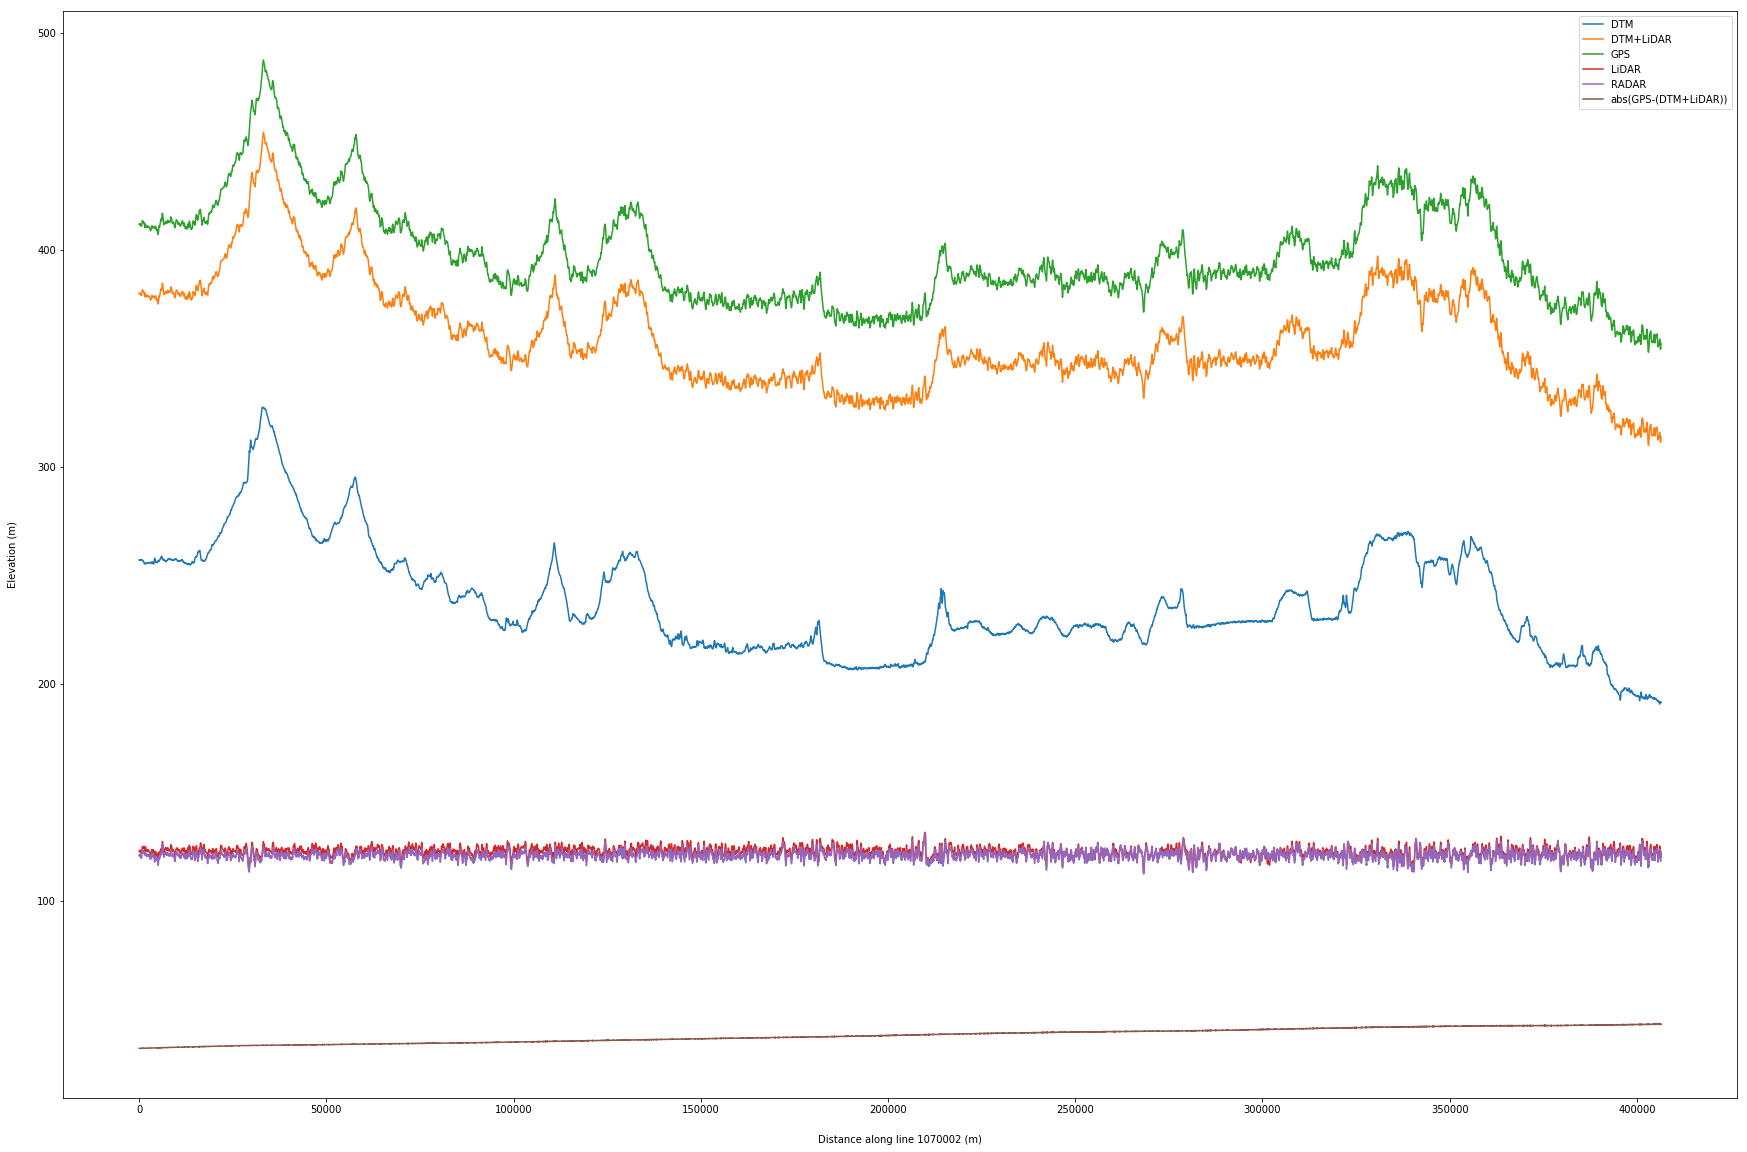

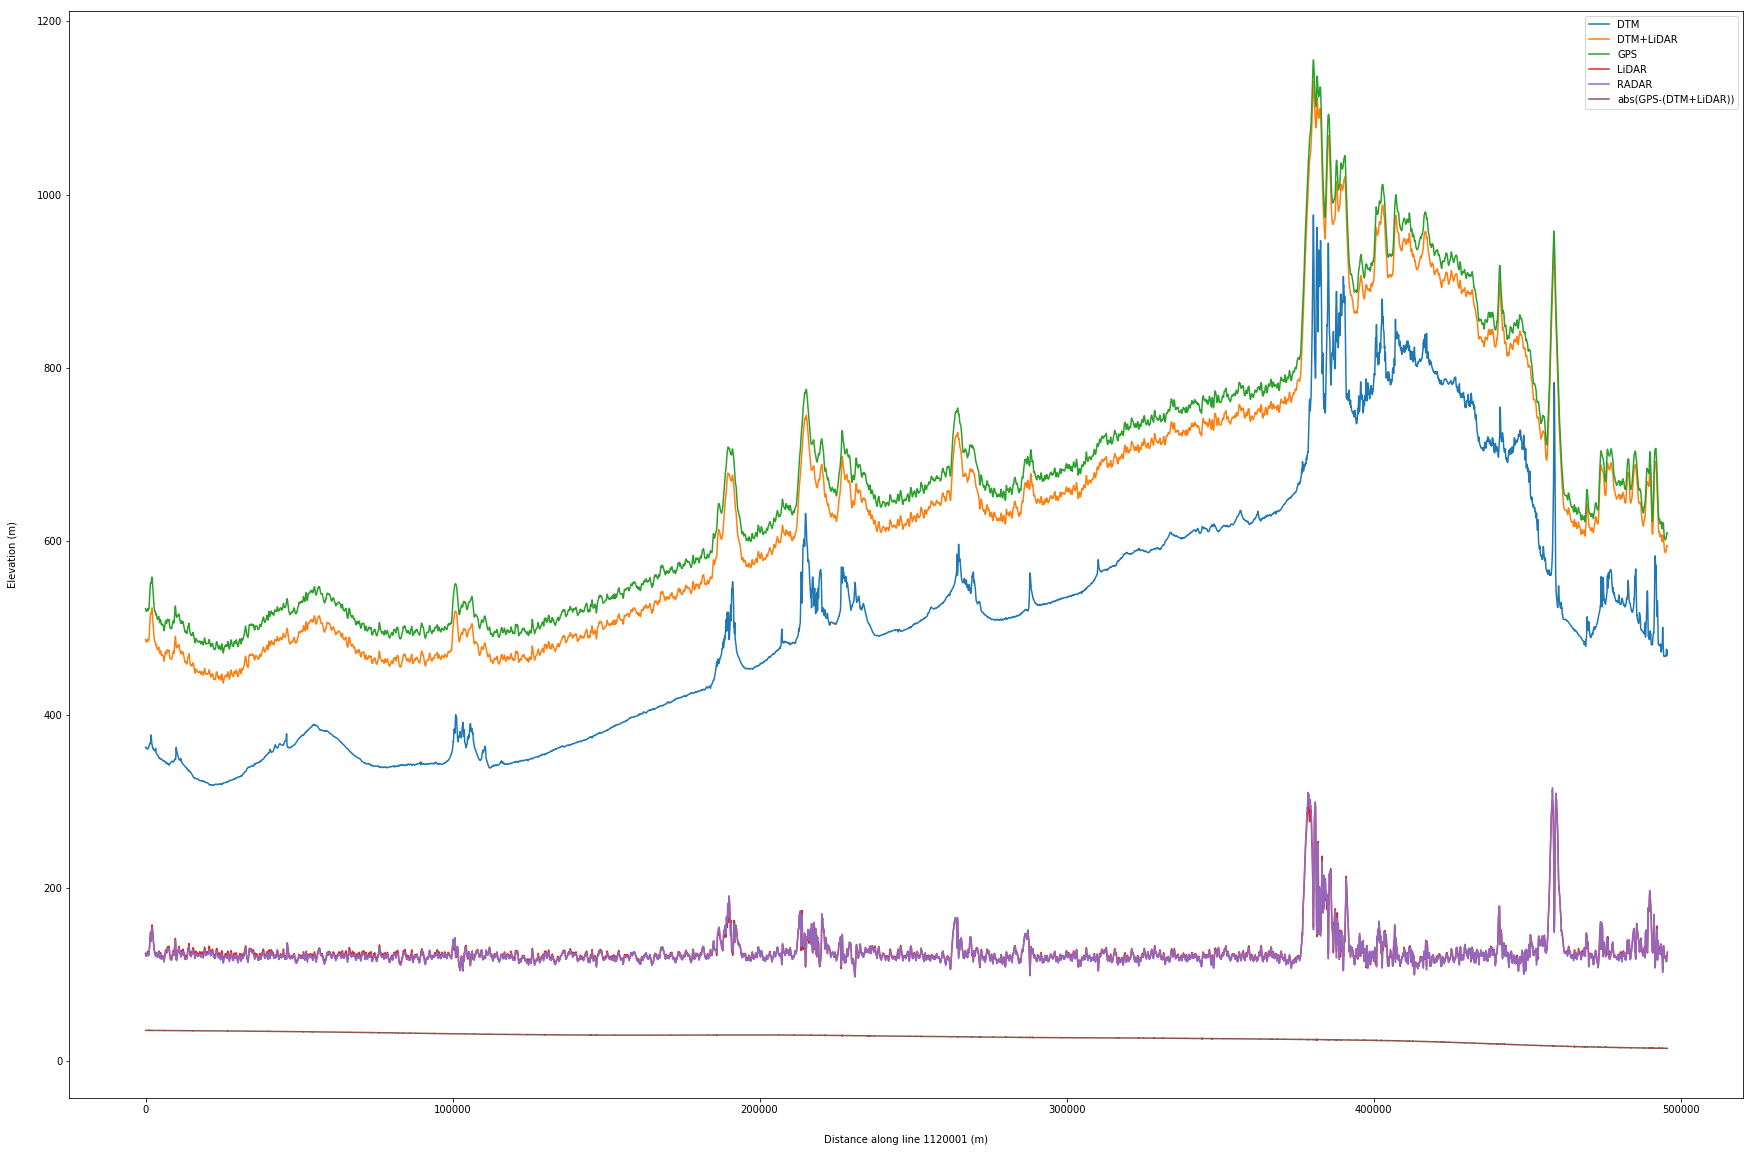

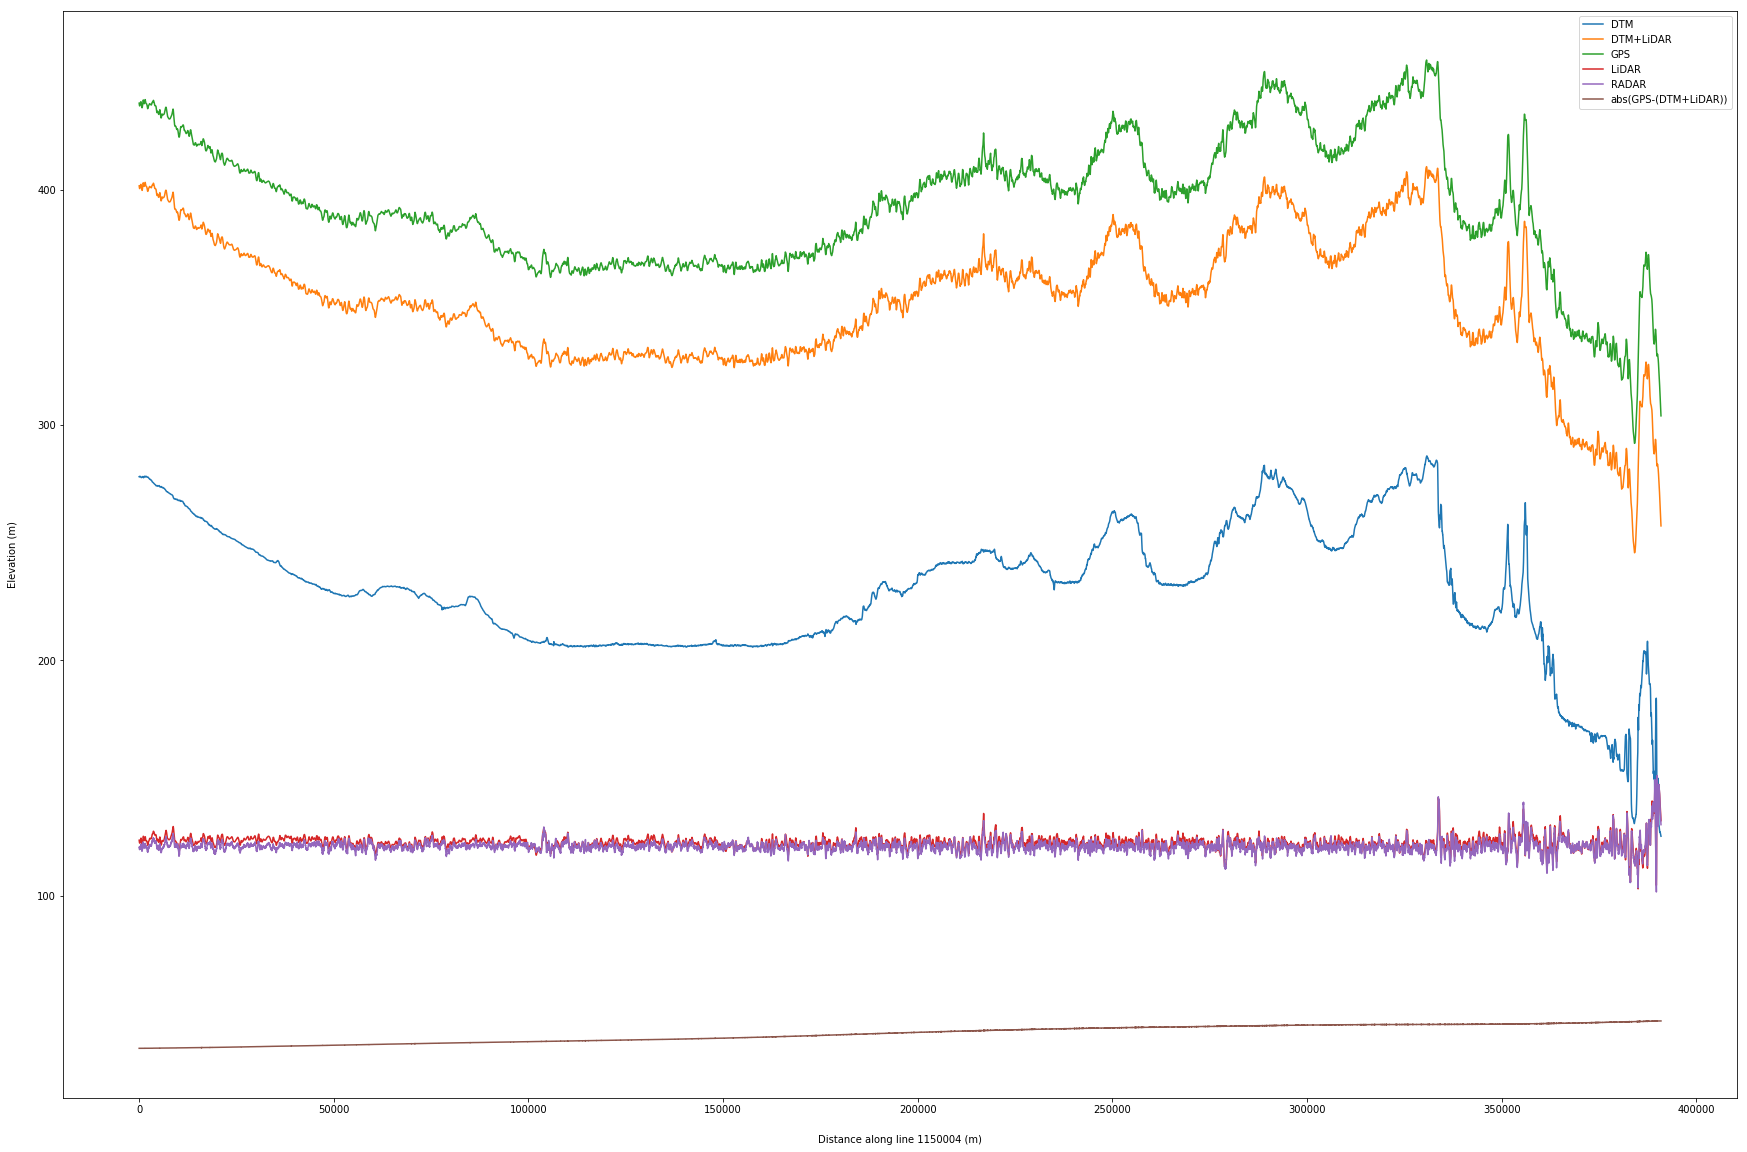

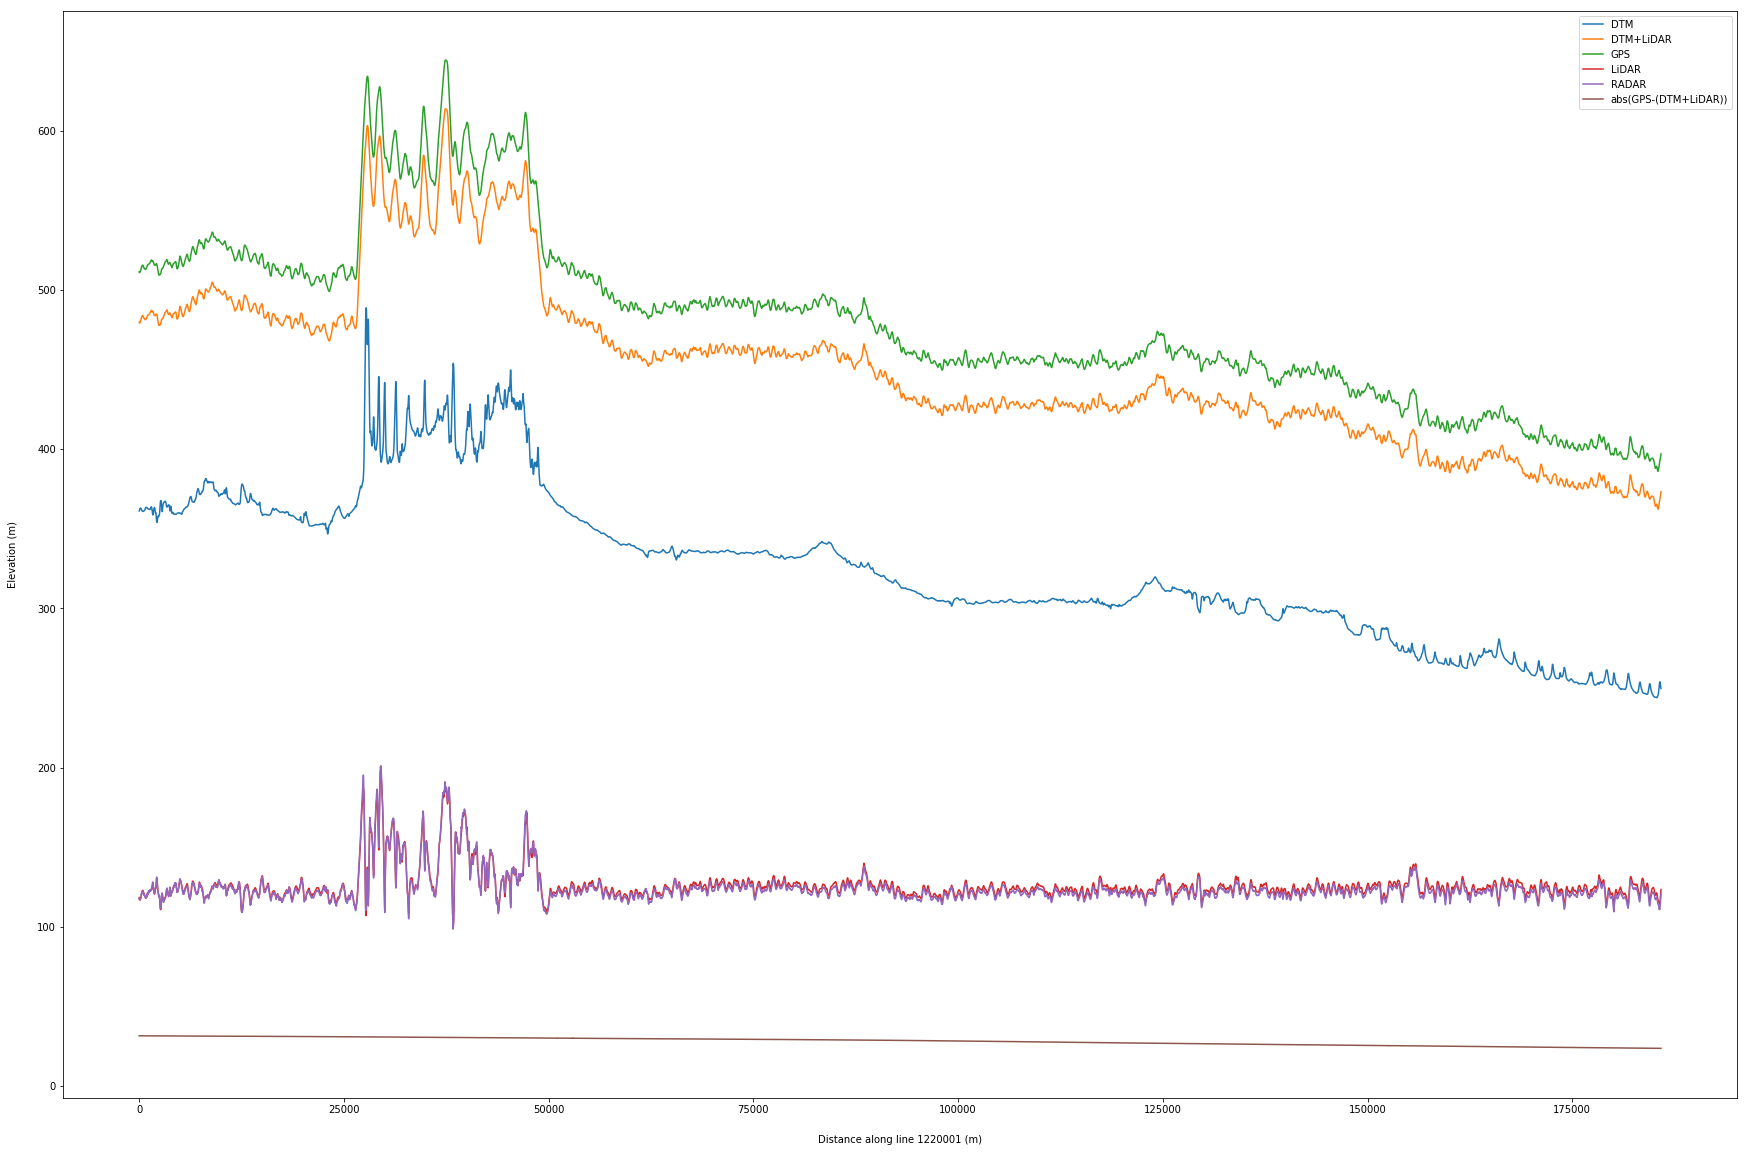

In [6]:
#Plot ground elevation along DEM and flight elevation (i.e. DEM+lidar) along lines
for line_number in line_numbers[::10]: # Process every 10th line
    line_mask = npu.get_lookup_mask([line_number]) 
    coordinates = npu.xycoords[line_mask]
    #print('coordinates: {}'.format(coordinates))
    utm_distances = npu.coords2metres(coordinates) # Compute cumulative distances along line
    
    
    lidar_values = netcdf_dataset.variables['lidar'][line_mask]
    gps_elevation_values = netcdf_dataset.variables['gps_elevation'][line_mask]
    dtm_values = netcdf_dataset.variables['dtm'][line_mask]
    radalt_values = netcdf_dataset.variables['radalt'][line_mask]
    print('Retrieved and calculated values from netCDF/OPeNDAP for line number {}'.format(line_number))

    # Plot data points against line distance for each line
    figure = plt.figure(figsize=(30,20))   
    plt.xlabel("Distance along line {} (m)".format(line_number), rotation=0, labelpad=20)
    plt.ylabel("Elevation (m)", rotation=90, labelpad=20)

    plt.plot(utm_distances, dtm_values, '-', label='DTM')   
    plt.plot(utm_distances, dtm_values+lidar_values, '-', label='DTM+LiDAR')  
    plt.plot(utm_distances, gps_elevation_values, '-', label='GPS') 
    plt.plot(utm_distances, lidar_values, '-', label='LiDAR')
    plt.plot(utm_distances, radalt_values, '-', label='RADAR')
    plt.plot(utm_distances, np.abs(gps_elevation_values-dtm_values-lidar_values), '-', label='abs(GPS-(DTM+LiDAR))') # Magenta line is gps-lidar alt

    plt.legend()

In [7]:
# Retrieve points for a set of lines
line_values = netcdf_dataset.variables['time_local'][:][npu.get_lookup_mask(lookup_variable_name='line',
                                                                         lookup_value_list=[1010001, 
                                                                                            1120002,
                                                                                            1250002])]
print(len(line_values))
line_values

67871


array([27751. , 27751.2, 27751.4, ..., 34137.6, 34137.8, 34138. ],
      dtype=float32)

In [8]:
# Show total number of points
netcdf_dataset.variables['time_local'].shape[0]

1372432